In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's create synthetic data points
from sklearn.datasets import make_classification

In [45]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [46]:
X

array([[-2.04873096, -0.39267753],
       [ 0.79035095,  1.04808607],
       [ 0.59803383,  0.26748594],
       ...,
       [-1.59705423, -0.65442907],
       [-0.18530494, -1.47155968],
       [ 1.33450017,  2.22766579]])

In [47]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [48]:
pd.DataFrame(X)[0]

0     -2.048731
1      0.790351
2      0.598034
3      0.903557
4     -0.888386
         ...   
995   -0.778634
996   -1.179003
997   -1.597054
998   -0.185305
999    1.334500
Name: 0, Length: 1000, dtype: float64

In [49]:
pd.DataFrame(X)[1]

0     -0.392678
1      1.048086
2      0.267486
3      0.165698
4     -1.066356
         ...   
995   -1.130543
996   -0.900830
997   -0.654429
998   -1.471560
999    2.227666
Name: 1, Length: 1000, dtype: float64

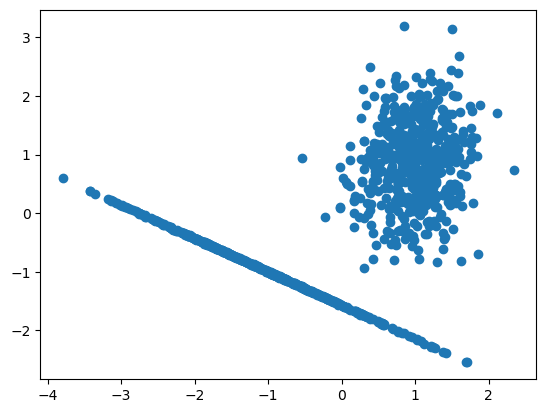

In [50]:
plt.scatter(pd.DataFrame(X)[0],  pd.DataFrame(X)[1])

In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC(kernel='linear')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [55]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
# Prediction
y_pred = svc.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

[[102   1]
 [  0  97]]


In [60]:
print(accuracy_score(y_test, y_pred))

0.995


In [62]:
# Verify Accuracy by applying cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=5)  # Use cv=5 for 5-fold cross-validation

In [63]:
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Scores: [1.    0.995 1.    1.    0.99 ]
Mean Cross-Validation Accuracy: 0.9970000000000001


In [68]:
## Apply Hyperparameter 
from sklearn.model_selection import GridSearchCV
# Defining Param
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [0.1, 1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']
             }

In [69]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, verbose=3, refit=True)

In [70]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [72]:
# Check which params has been selected
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [73]:
# prediction
grid_pred = grid.predict(X_test)
print(classification_report(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))
print(accuracy_score(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

[[102   1]
 [  0  97]]
0.995
